In [ ]:
# importing the librarires
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the dataset
data = pd.read_csv("/content/sample_data/CarPrice_Assignment.csv")
data.shape

(205, 26)

In [ ]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# cleaning the data
#  Separate the CarName variable to two columns: CompanyName and CarModel
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop(['CarName'],axis=1,inplace=True)
data.drop(['car_ID'],axis=1,inplace=True)
data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
data = data.replace(to_replace ="maxda", value ="mazda") 
data = data.replace(to_replace ="porcshce", value ="porsche") 
data = data.replace(to_replace ="toyouta", value ="toyota") 
data = data.replace(to_replace ="vokswagen", value ="volkswagen") 
data = data.replace(to_replace ="vw", value ="volkswagen")
data = data.replace(to_replace ="Nissan", value ="nissan")
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

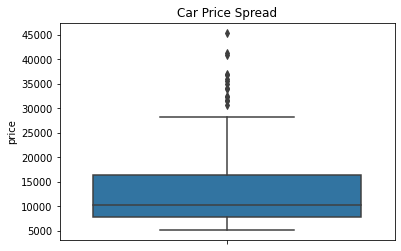

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [ ]:
# Exploratory of Data
# Dependent variable visualization: Price
plt.title('Car Price Spread')
sns.boxplot(y=data.price)
plt.show()
print(data.price.describe())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


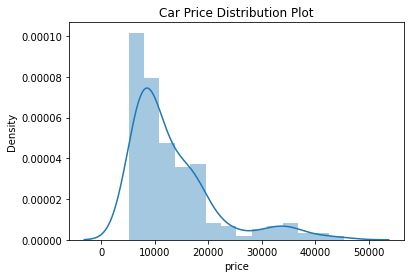

In [ ]:
plt.title('Car Price Distribution Plot')
sns.distplot(data.price)
plt.show()

In [ ]:
print(data.price.describe())

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [ ]:
# Visualization of independent variables:
# I. Check the linear relationship between the dependent variable "Price" and the numerical independent variables
import scipy
from scipy.stats.stats import pearsonr

def pairplot(x_axis,y_axis) :
    sns.pairplot(data,x_vars=x_axis,y_vars=y_axis,height=4,aspect=1,kind="scatter")
    plt.show()

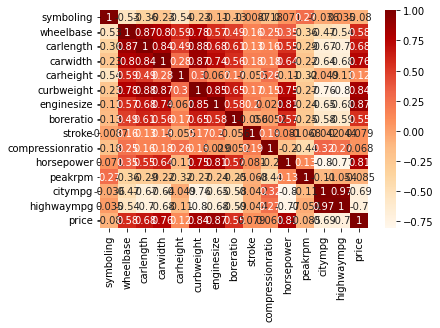

In [ ]:
# II. Checking the multicollinearity between the correlated independent variables above and Price
def heatmap(x,y,dataframe):
    sns.heatmap(dataframe.corr(),cmap="OrRd",annot=True)
    plt.show()

heatmap(20,12,data)

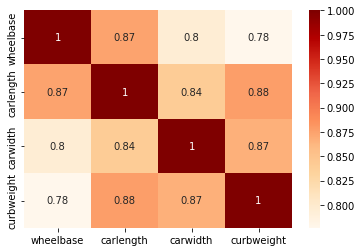

In [ ]:
# a. Examination of the correlation between the variables specific to the dimensions of a car i.e. weight, height etc
dimension_col_list = ['wheelbase', 'carlength', 'carwidth','curbweight']

heatmap(10,10,data.filter(dimension_col_list))

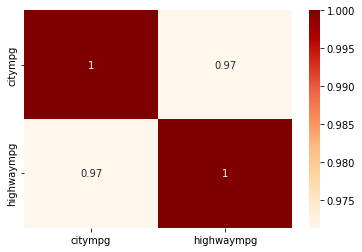

In [ ]:
# c. Examining the correlation between citympg and highwaympg
performance_col_list = ['citympg','highwaympg']
heatmap(10,10,data.filter(performance_col_list))

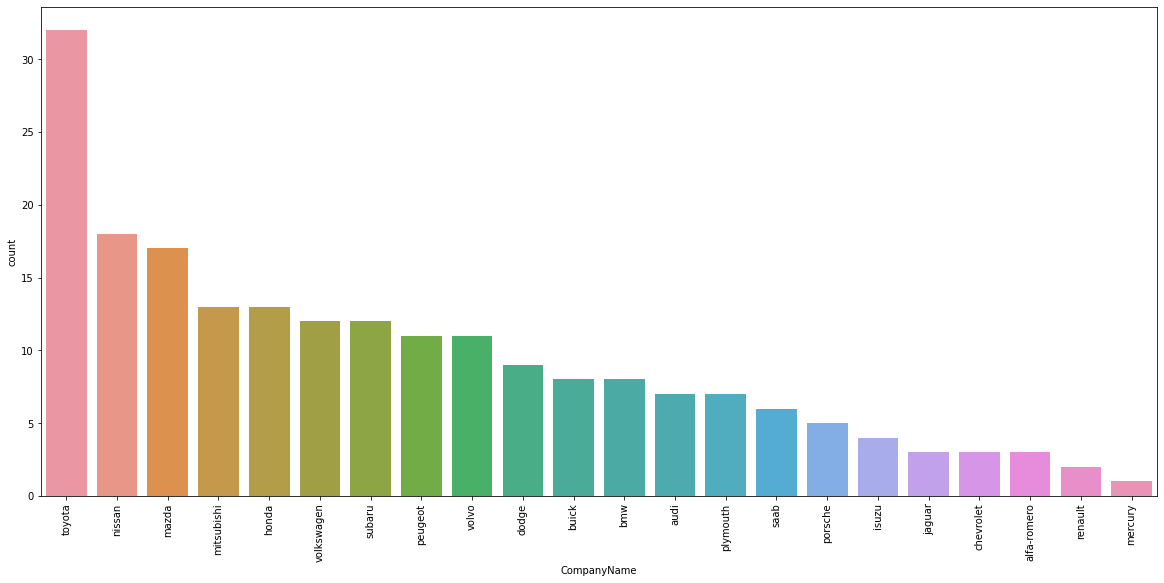

In [ ]:
# "Categorical"
# Price VS CompanyName
plt.figure(figsize=(20,9))

plt.xticks(rotation = 90)
order = data['CompanyName'].value_counts(ascending=False).index
sns.countplot(x='CompanyName', data=data, order=order)

plt.show()

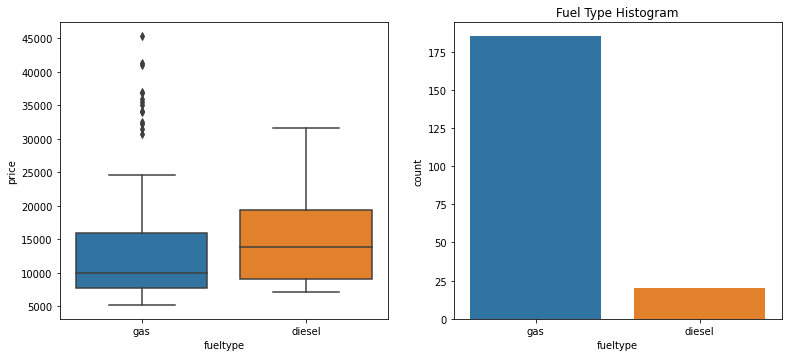

In [ ]:
 # Price VS fueltype
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)

plt.subplot(2,3,2)
plt.title('Fuel Type Histogram')
order = data['fueltype'].value_counts(ascending=False).index
sns.countplot(x='fueltype', data=data, order=order)

plt.show()

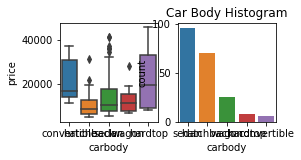

In [ ]:
# Price VS carbody
plt.subplot(2,3,1)
sns.boxplot(x='carbody',y='price',data = data)

plt.subplot(2,3,2)
plt.title('Car Body Histogram')
order = data['carbody'].value_counts(ascending=False).index
sns.countplot(x='carbody', data=data, order=order)

plt.show()

In [ ]:
data = data.drop(['carheight' ,'stroke' ,'compressionratio' ,'peakrpm' ,'carlength' ,'carwidth' ,'curbweight' ,'enginesize' ,'highwaympg'], axis=1)
data.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,enginetype,cylindernumber,fuelsystem,boreratio,horsepower,citympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,dohc,four,mpfi,3.47,111,21,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,dohc,four,mpfi,3.47,111,21,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,ohcv,six,mpfi,2.68,154,19,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,ohc,four,mpfi,3.19,102,24,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,ohc,five,mpfi,3.19,115,18,17450.0


In [ ]:
# Dummy variable creation
def binary_dummy_replace(x) :
     return x.map({"gas":1,"diesel":0,
                   "std":1,"turbo":0,
                   "two":1, "four":0,
                   "front": 1, "rear": 0})
def dummies(x,df):  
    temp = pd.get_dummies(df[x], prefix=x, drop_first = True)
    
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [ ]:
data = dummies('symboling',data)
data = dummies('CompanyName',data)
data = dummies('fueltype',data)
data = dummies('aspiration',data)
data = dummies('doornumber',data)
data = dummies('carbody',data)
data = dummies('drivewheel',data)
data = dummies('enginelocation',data)
data = dummies('enginetype',data)
data = dummies('cylindernumber',data)
data = dummies('fuelsystem',data)

In [ ]:
data.head()

,wheelbase,boreratio,horsepower,citympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,3.47,111,21,13495.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,88.6,3.47,111,21,16500.0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,94.5,2.68,154,19,16500.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,99.8,3.19,102,24,13950.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,3.19,115,18,17450.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Preparation of Train and Test data
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
cars_train, cars_test= train_test_split(data, train_size=0.67, test_size=0.33, random_state = 0)

In [ ]:
# Feature Scaling: Train Set & Test Set
from sklearn.preprocessing import StandardScaler,scale

# we create an object of the class StandardScaler
sc = StandardScaler() 

col_to_scale = ['wheelbase','boreratio','horsepower','citympg','price',]

cars_train[col_to_scale] = sc.fit_transform(cars_train[col_to_scale])
cars_test[col_to_scale] = sc.fit_transform(cars_test[col_to_scale])

cars_train.head()

,wheelbase,boreratio,horsepower,citympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
155,-0.534054,-1.097737,-1.103524,0.333598,-0.583062,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
97,-0.723234,-0.725116,-0.921031,1.008180,-0.680192,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
54,-0.943944,-0.985950,-0.947101,1.008180,-0.755502,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
184,-0.281814,-1.246785,-1.364229,2.020054,-0.680691,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
51,-0.943944,-1.172261,-0.947101,1.008180,-0.917592,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Division into X_train and y_train sets for model construction
y_train = cars_train.loc[:,cars_train.columns == 'price']
X_train = cars_train.loc[:, cars_train.columns != 'price']

In [ ]:
# Division into X_test and y_test sets
y_test = cars_test.loc[:,cars_test.columns == 'price']
X_test = cars_test.loc[:, cars_test.columns != 'price']

In [ ]:
# Prediction
# Making predictions
import statsmodels.api as sm 
lm = sm.OLS(y_train,X_train).fit()
y_pred=lm.predict(X_test)

In [ ]:
# Evaluation
# Residual analysis of the model
resid = y_test - y_pred.to_frame('price')

In [ ]:
# final summary 1
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8558800905758743

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     56.21
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           1.01e-48
Time:                        03:10:37   Log-Likelihood:                 46.514
No. Observations:                 137   AIC:                             8.971
Df Residuals:                      86   BIC:                             157.9
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
wheelbase                  0

In [ ]:
# doing better using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)



LinearRegression(normalize=False)

In [ ]:
rfe = RFE(regression, n_features_to_select=10)
rfe = rfe.fit(X_train,y_train)

In [ ]:
for z in range(len(X_train.columns)):
    print(X_train.columns[z],'\t\t\t',rfe.support_[z])

wheelbase 			 False
boreratio 			 False
horsepower 			 True
citympg 			 False
symboling_-1 			 False
symboling_0 			 False
symboling_1 			 False
symboling_2 			 False
symboling_3 			 False
CompanyName_audi 			 False
CompanyName_bmw 			 True
CompanyName_buick 			 True
CompanyName_chevrolet 			 False
CompanyName_dodge 			 False
CompanyName_honda 			 False
CompanyName_isuzu 			 False
CompanyName_jaguar 			 True
CompanyName_mazda 			 False
CompanyName_mercury 			 False
CompanyName_mitsubishi 			 False
CompanyName_nissan 			 False
CompanyName_peugeot 			 False
CompanyName_plymouth 			 False
CompanyName_porsche 			 True
CompanyName_renault 			 False
CompanyName_saab 			 False
CompanyName_subaru 			 False
CompanyName_toyota 			 False
CompanyName_volkswagen 			 False
CompanyName_volvo 			 False
fueltype_gas 			 False
aspiration_turbo 			 False
doornumber_two 			 False
carbody_hardtop 			 True
carbody_hatchback 			 True
carbody_sedan 			 True
carbody_wagon 			 True
drivewheel_fwd 			 False
driv